In [ ]:
# 📦 Step 1: Install Required Package
!pip install pytorch-tabular

In [1]:
# 📄 Title: TabTransformer-Based Metrics for Evaluating Remote Employee Efficiency

# 🧠 Step 2: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from pytorch_tabular import TabularModel
from pytorch_tabular.models.tab_transformer import TabTransformerConfig
from pytorch_tabular.config import DataConfig, TrainerConfig, OptimizerConfig

# 📁 Step 3: Load & Preprocess Dataset
df = pd.read_csv("/content/drive/MyDrive/Lydia/SC2/dataset/Extended_Employee_Performance_and_Productivity_Data.csv")
df = df.drop(columns=["Employee_ID", "Hire_Date"])
df = df.rename(columns={"Performance_Score": "PerformanceScore"})

categorical_cols = ['Department', 'Gender', 'Job_Title', 'Education_Level']
continuous_cols = [col for col in df.columns if col not in categorical_cols + ["PerformanceScore", "Resigned"]]

train, test = train_test_split(df, test_size=0.2, random_state=42)

# 📋 Step 4: Data Configuration
data_config = DataConfig(
    target=["PerformanceScore"],
    continuous_cols=continuous_cols,
    categorical_cols=categorical_cols
)

# ⚙️ Step 5: TabTransformer Model Configuration
model_config = TabTransformerConfig(
    task="regression",                              # Predict continuous efficiency score
    metrics=["mean_squared_error", "r2_score"],     # Evaluation metrics
    learning_rate=1e-3,
    input_embed_dim=32,
    num_heads=4,
    num_attn_blocks=2,
    attn_dropout=0.1,
    add_norm_dropout=0.1,
    ff_dropout=0.1,
    ff_hidden_multiplier=4,
    transformer_activation="GEGLU",
    batch_norm_continuous_input=True,
    head="LinearHead"
)

# 🛠 Step 6: Trainer & Optimizer Config
trainer_config = TrainerConfig(
    auto_lr_find=True,
    batch_size=512,
    max_epochs=5,
    accelerator="auto",
    devices=1,
    load_best=False
)
optimizer_config = OptimizerConfig()

# 🚀 Step 7: Initialize & Train Model
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    trainer_config=trainer_config,
    optimizer_config=optimizer_config
)

tabular_model.fit(train=train, validation=test)

# 📊 Step 8: Evaluation & Prediction
results = tabular_model.evaluate(test)
print("📈 Evaluation Results:", results)

preds = tabular_model.predict(test)
print(preds.head())

INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71:

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.0007585775750291836
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_2ce914c6-6434-46fa-9183-a52ffbfb5db2.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint at /content/.lr_find_2ce914c6-6434-46fa-9183-a52ffbfb5db2.ckpt
INFO:pytorch_tabular.tabular_model:Suggested LR: 0.0007585775750291836. For plot and detailed analysis, use `find_learning_rate` method.
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │ 57.7 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer       │    896 │ train │
│ 2 │ _head            │ LinearHead             │    141 │ train │
│ 3 │ loss             │ MSELoss                │      0 │ train │
└───┴──────────────────┴────────────────────────┴────────┴───────┘

Trainable params: 58.7 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 58.7 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 55                                                                                          
Modules in eval mode: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


INFO:pytorch_tabular.tabular_model:Training the model completed


Output()

/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.9255195260047913     │
│  test_mean_squared_error  │    0.9255195260047913     │
│       test_r2_score       │    0.5373920798301697     │
└───────────────────────────┴───────────────────────────┘

📈 Evaluation Results: [{'test_loss': 0.9255195260047913, 'test_mean_squared_error': 0.9255195260047913, 'test_r2_score': 0.5373920798301697}]


/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

       PerformanceScore_prediction
75721                     2.649372
80184                     3.481417
19864                     3.025514
76699                     2.544542
92991                     3.252455


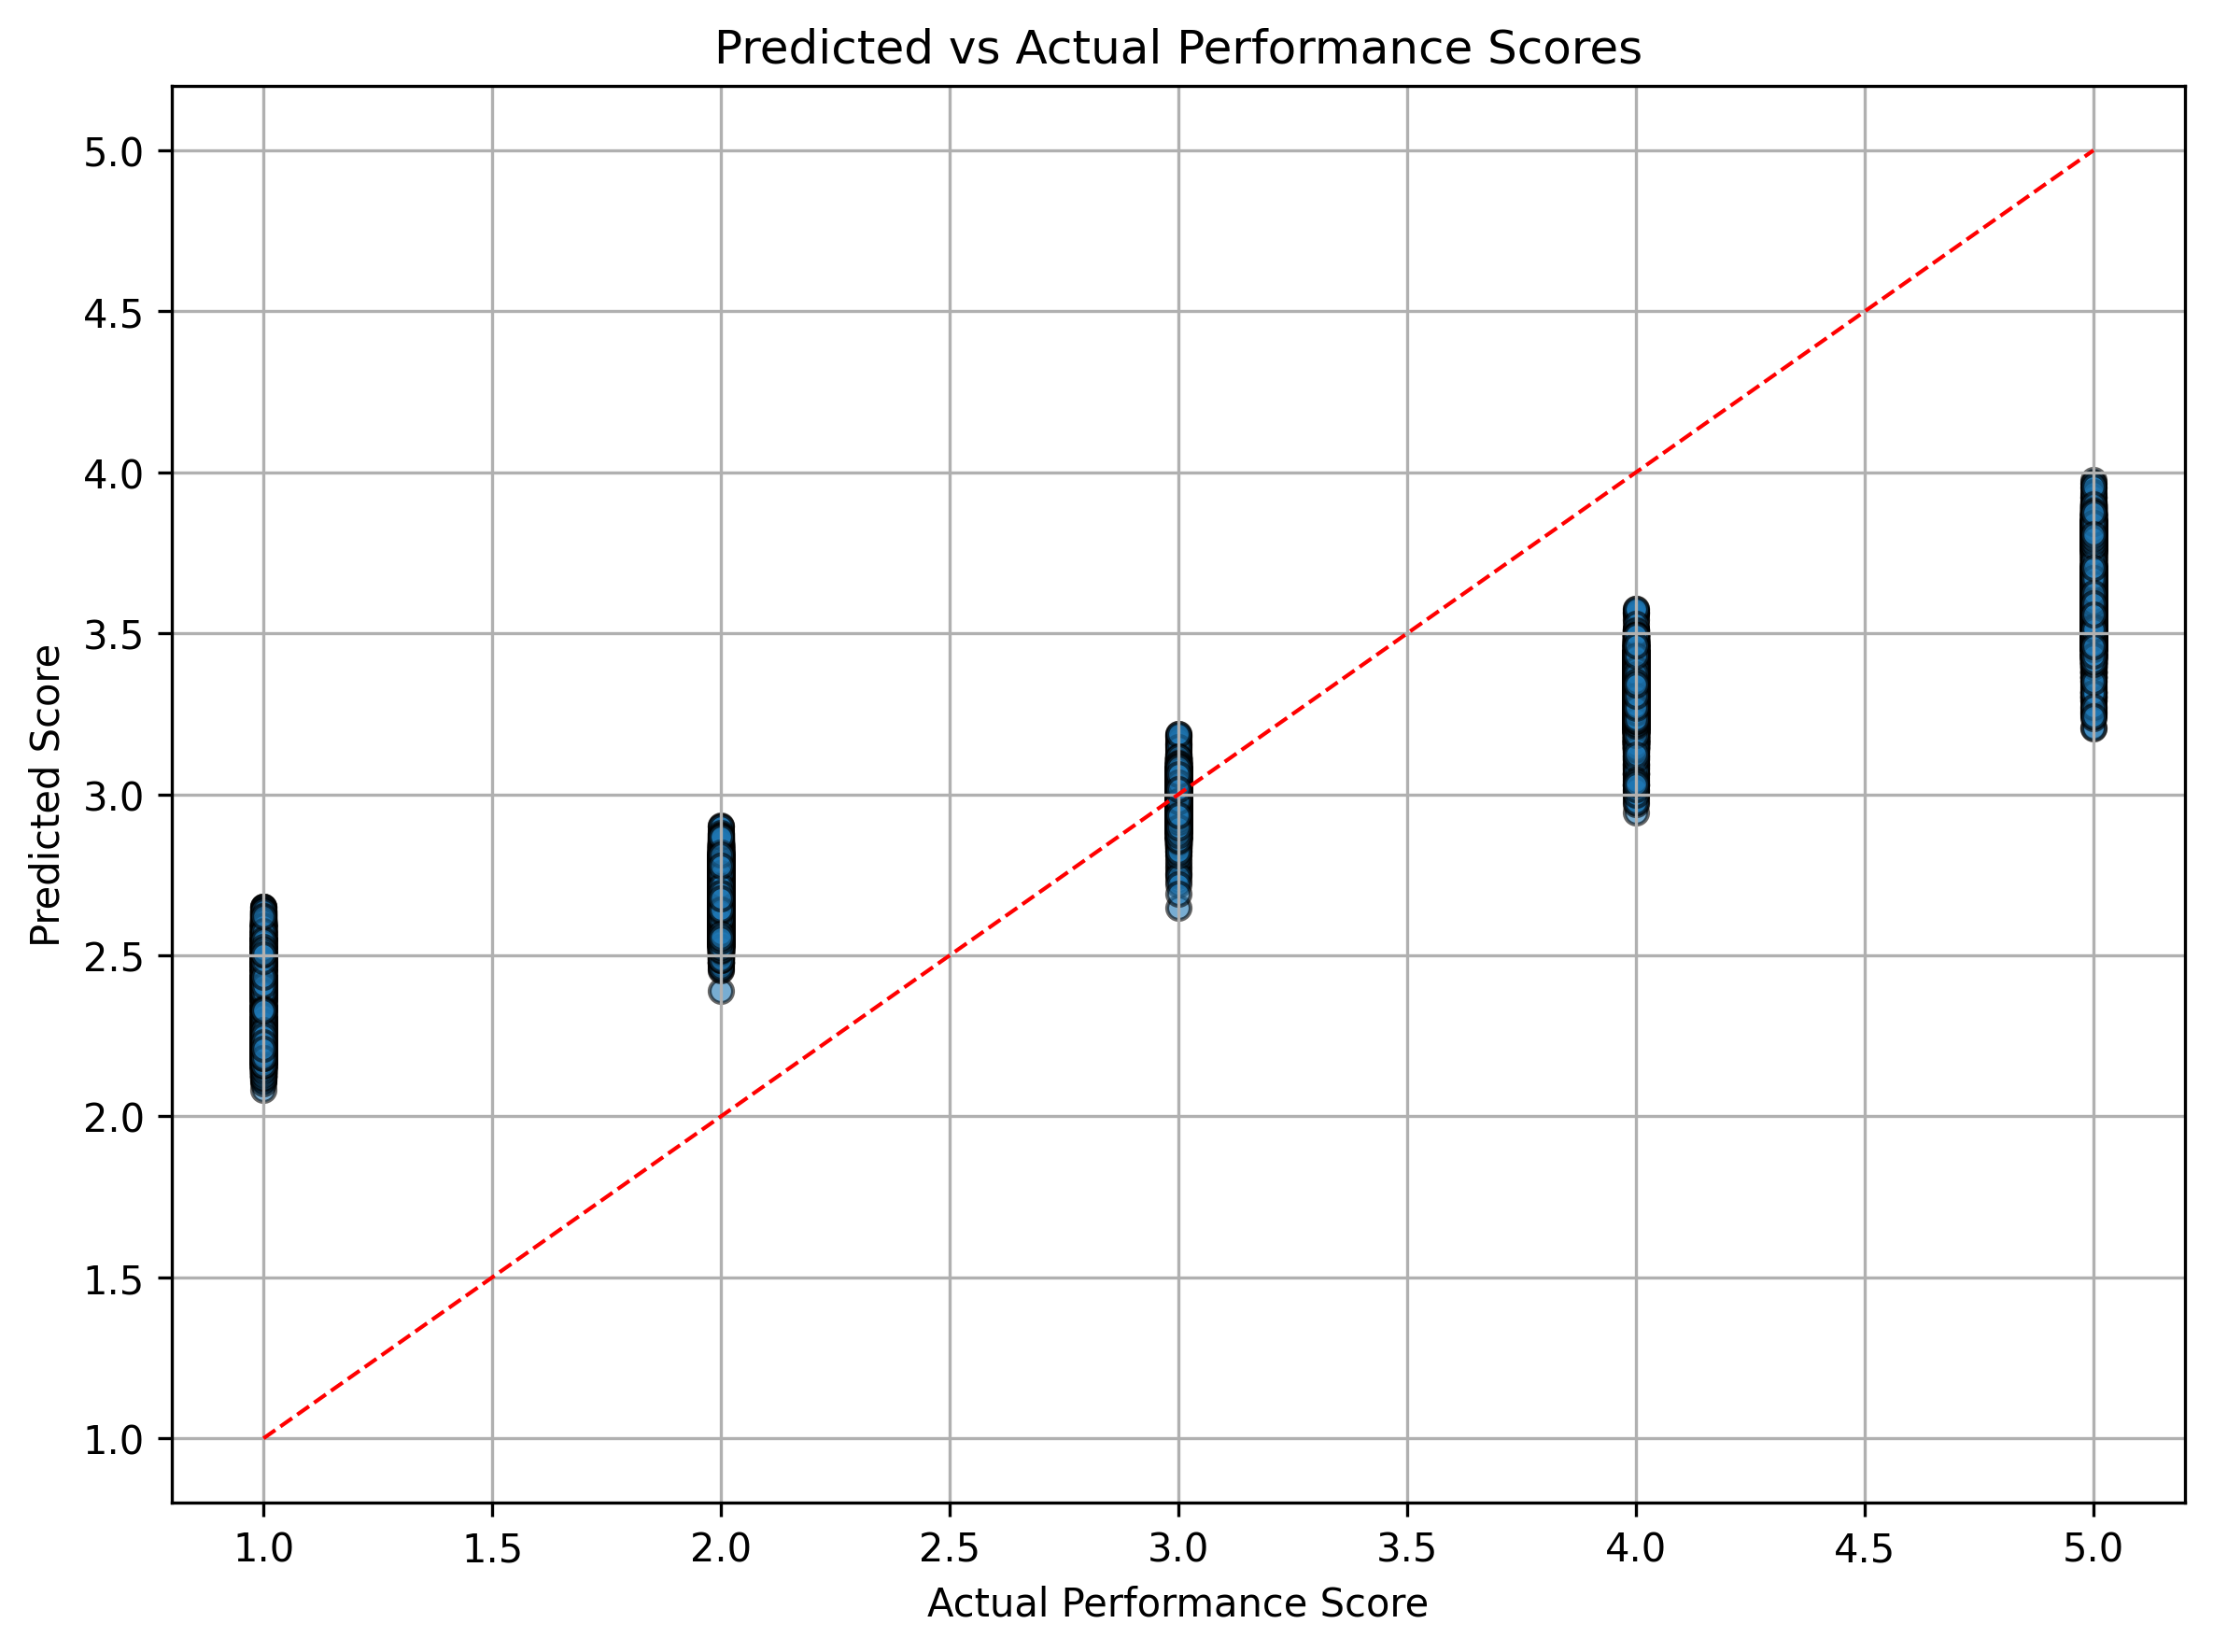

In [2]:
# 📉 Visualization: Actual vs Predicted
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import *

actual = test["PerformanceScore"].values
predicted = preds["PerformanceScore_prediction"].values

plt.figure(figsize=(8, 6), dpi=300)
plt.scatter(actual, predicted, alpha=0.6, edgecolors='k')
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--', linewidth=1)
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Score")
plt.title("Predicted vs Actual Performance Scores")
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
# 📐 Additional Metrics
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
r2 = r2_score(actual, predicted)
msle = mean_squared_log_error(actual, predicted)
mape = mean_absolute_percentage_error(actual, predicted)

print("\n🔍 Additional Regression Metrics:")
print(f"📏 MAE: {mae:.4f}")
print(f"📉 RMSE: {rmse:.4f}")
print(f"📈 R² Score: {r2:.4f}")
print(f"🧮 MSLE: {msle:.4f}")
print(f"📊 MAPE: {mape:.2%}")


🔍 Additional Regression Metrics:
📏 MAE: 0.8221
📉 RMSE: 0.9620
📈 R² Score: 0.5384
🧮 MSLE: 0.0794
📊 MAPE: 42.98%


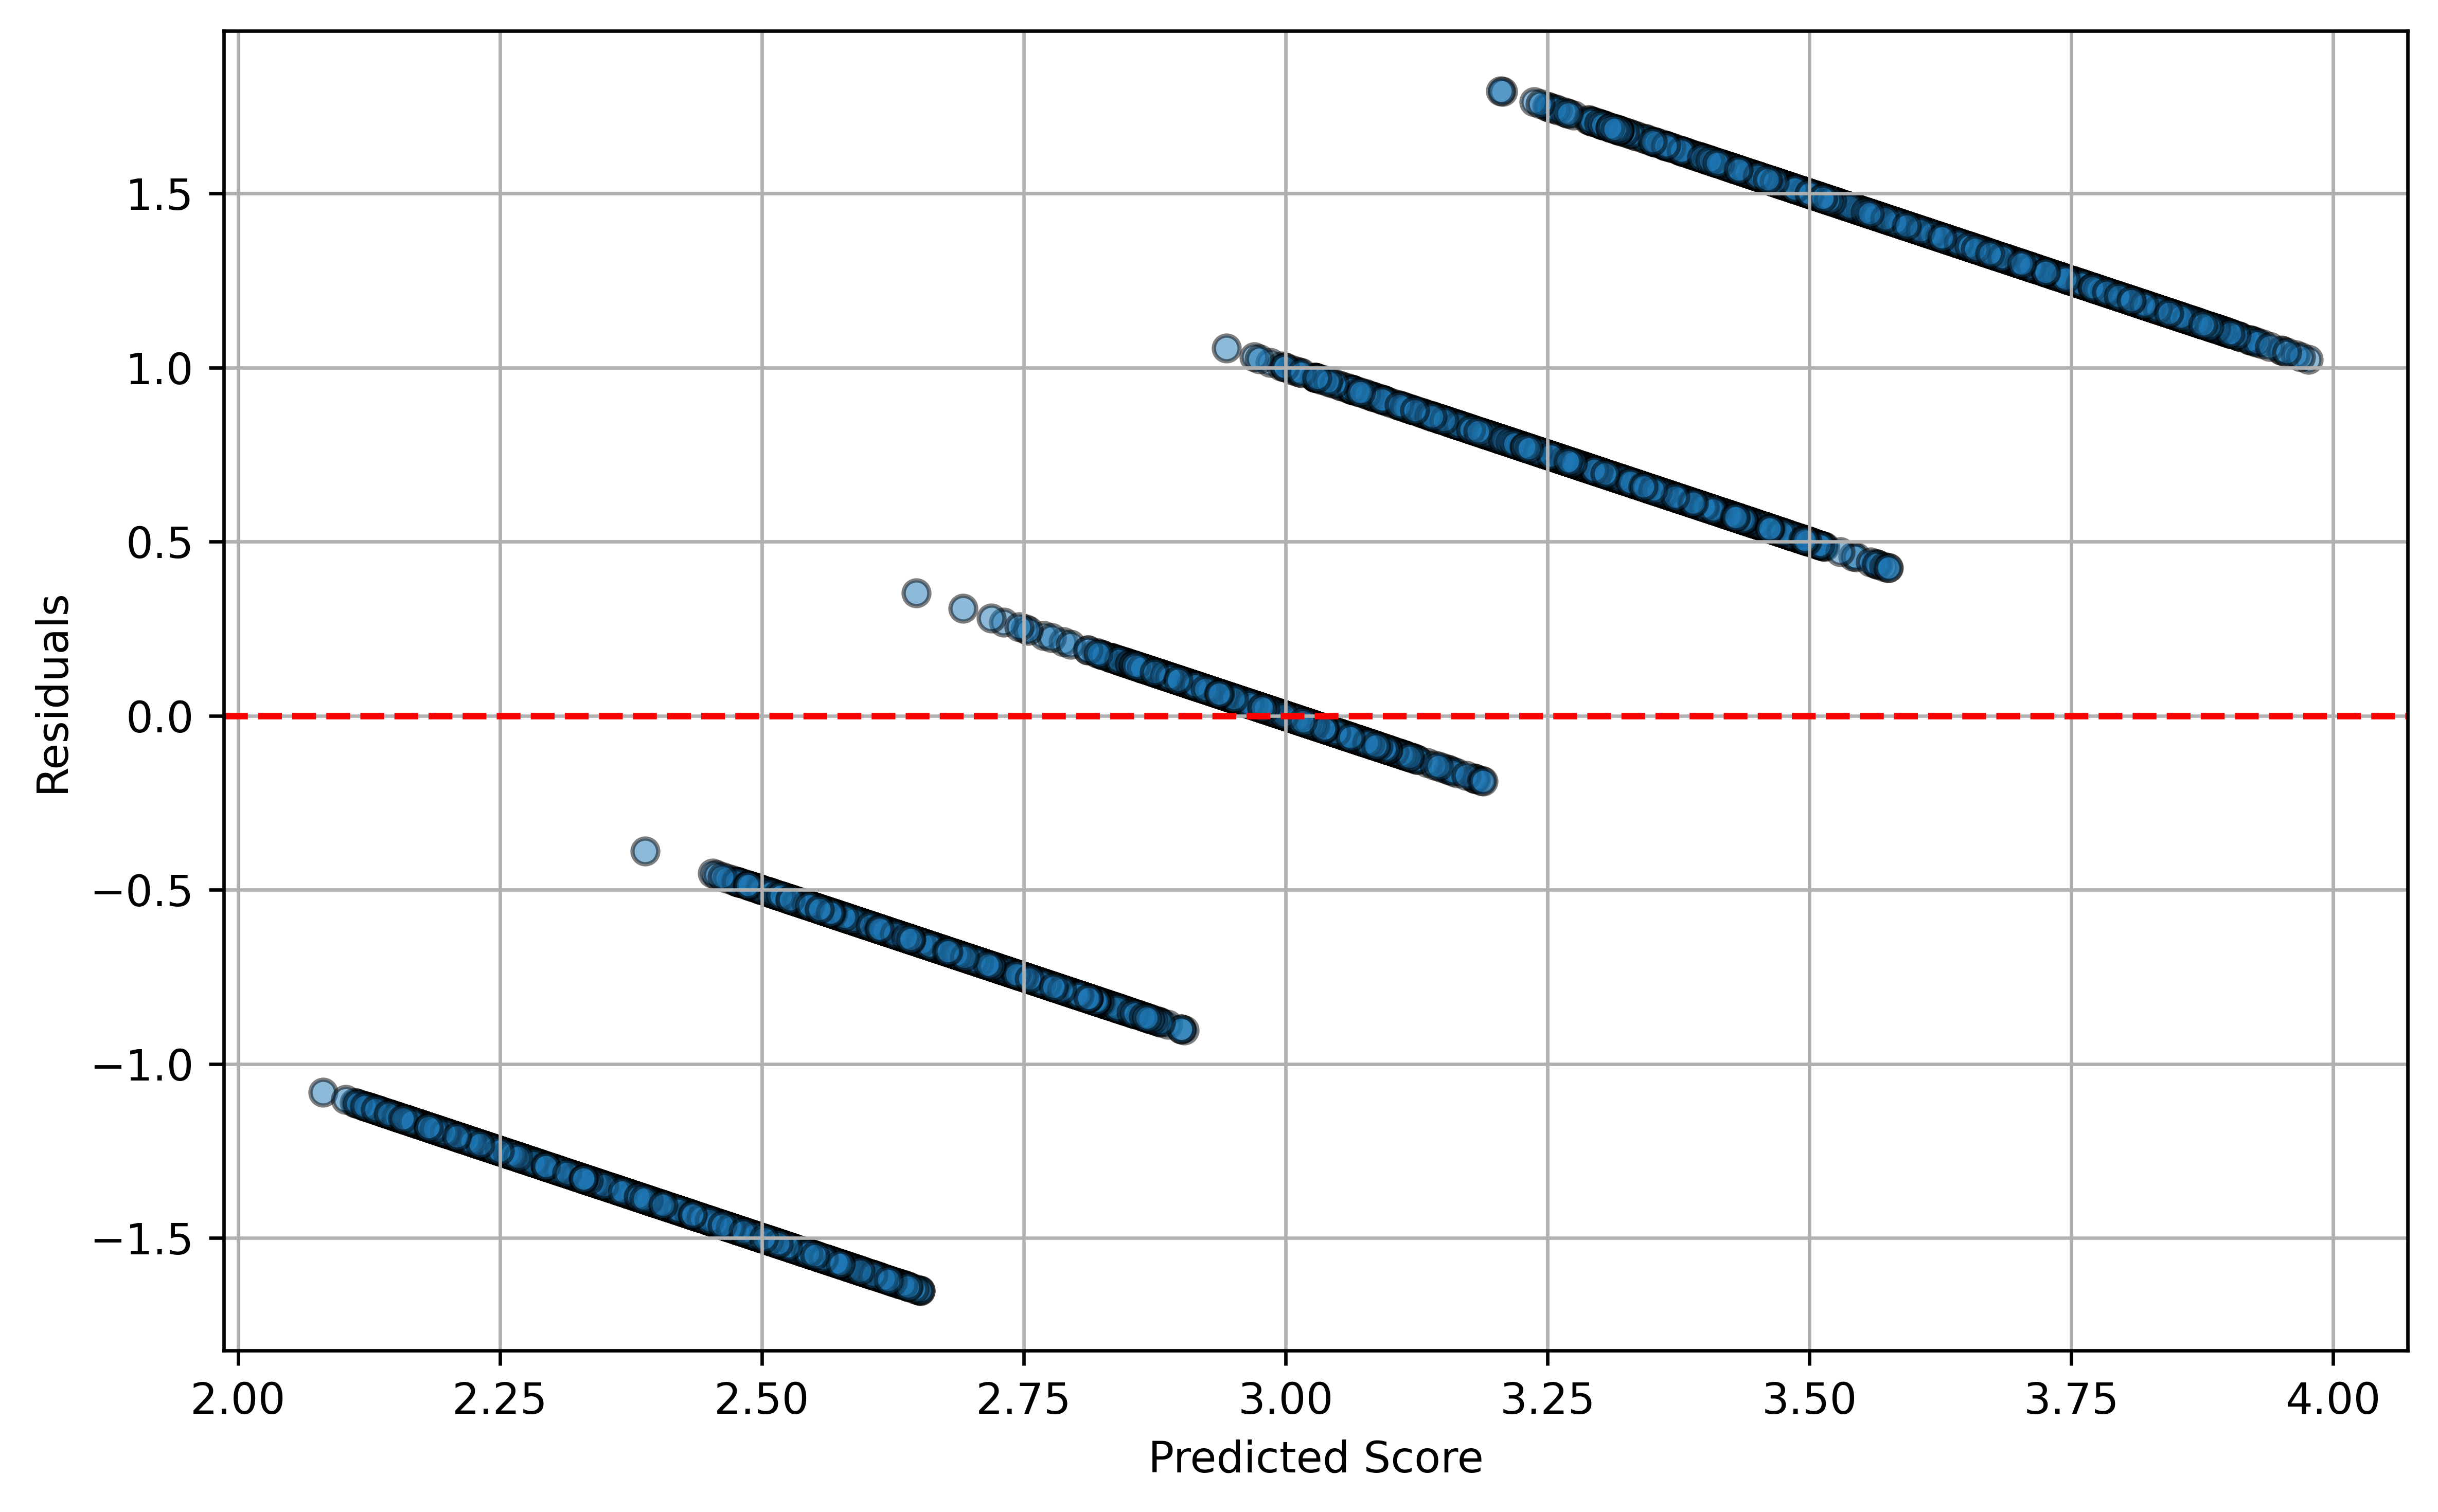

In [4]:
# 📉 Residual Plot
residuals = actual - predicted

plt.figure(figsize=(8, 5), dpi=600)
plt.scatter(predicted, residuals, alpha=0.5, edgecolors='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Score")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

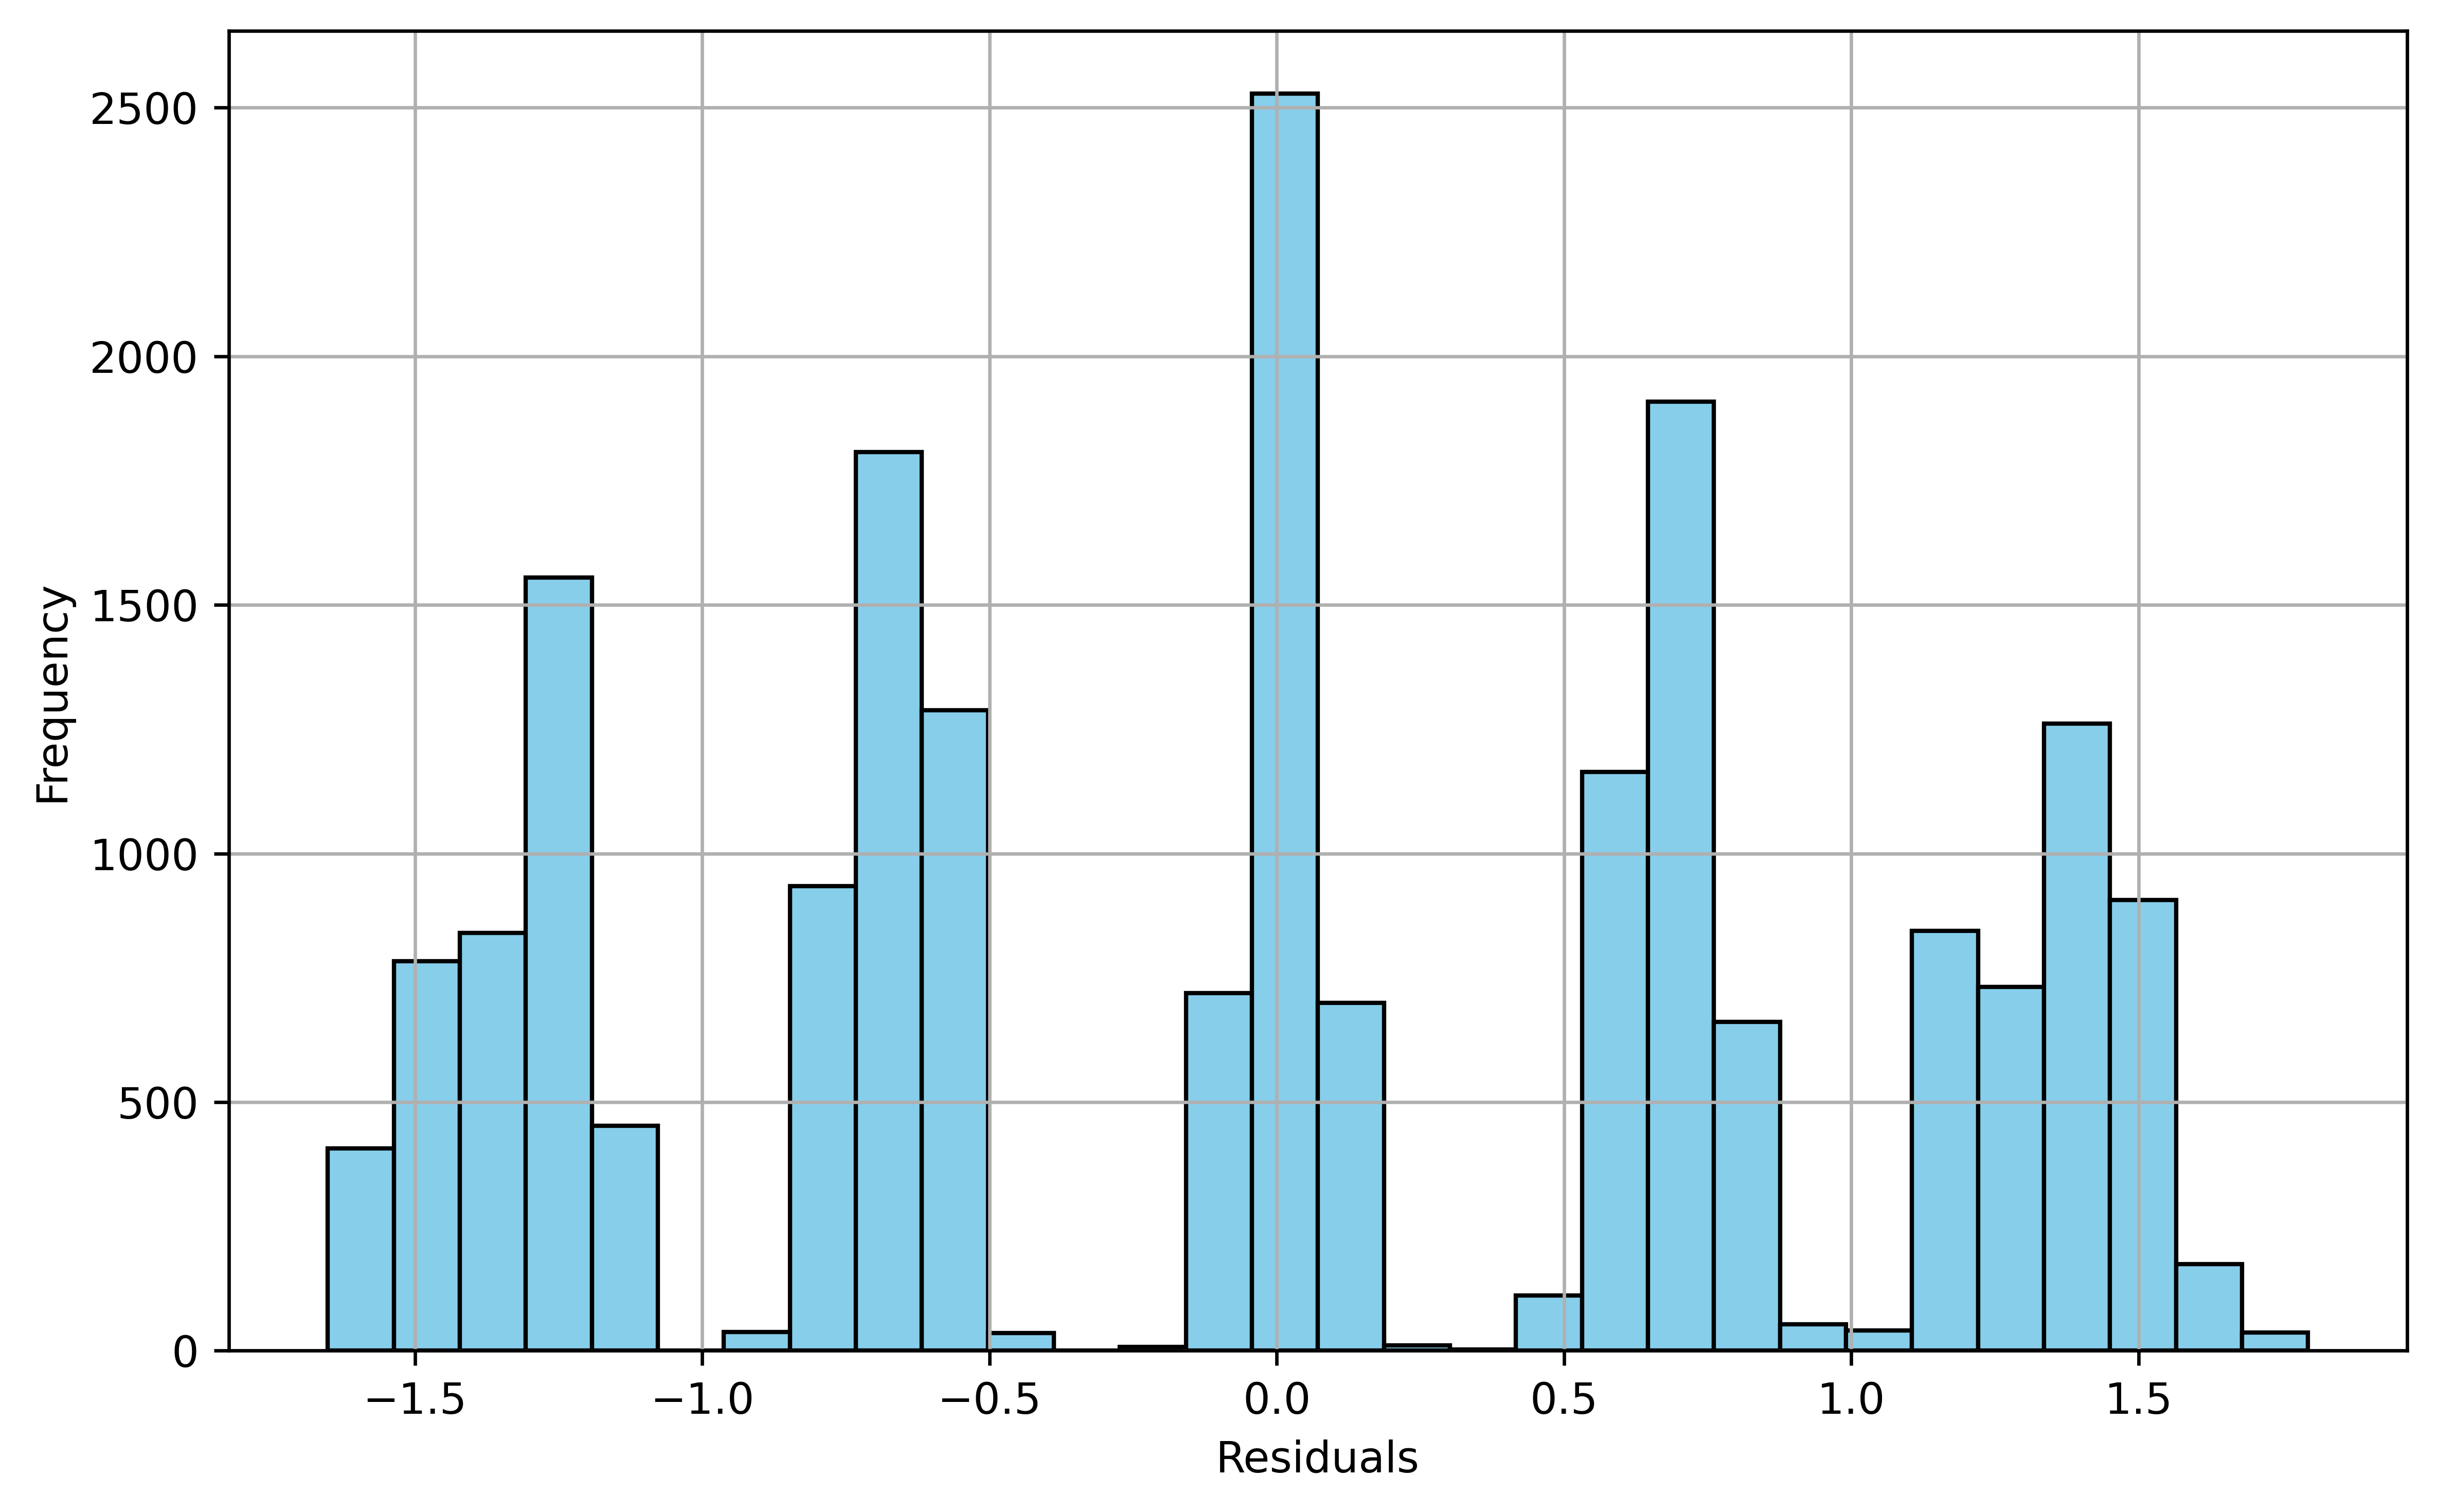

In [5]:
# 📊 Histogram of Residuals
plt.figure(figsize=(8, 5), dpi=600)
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

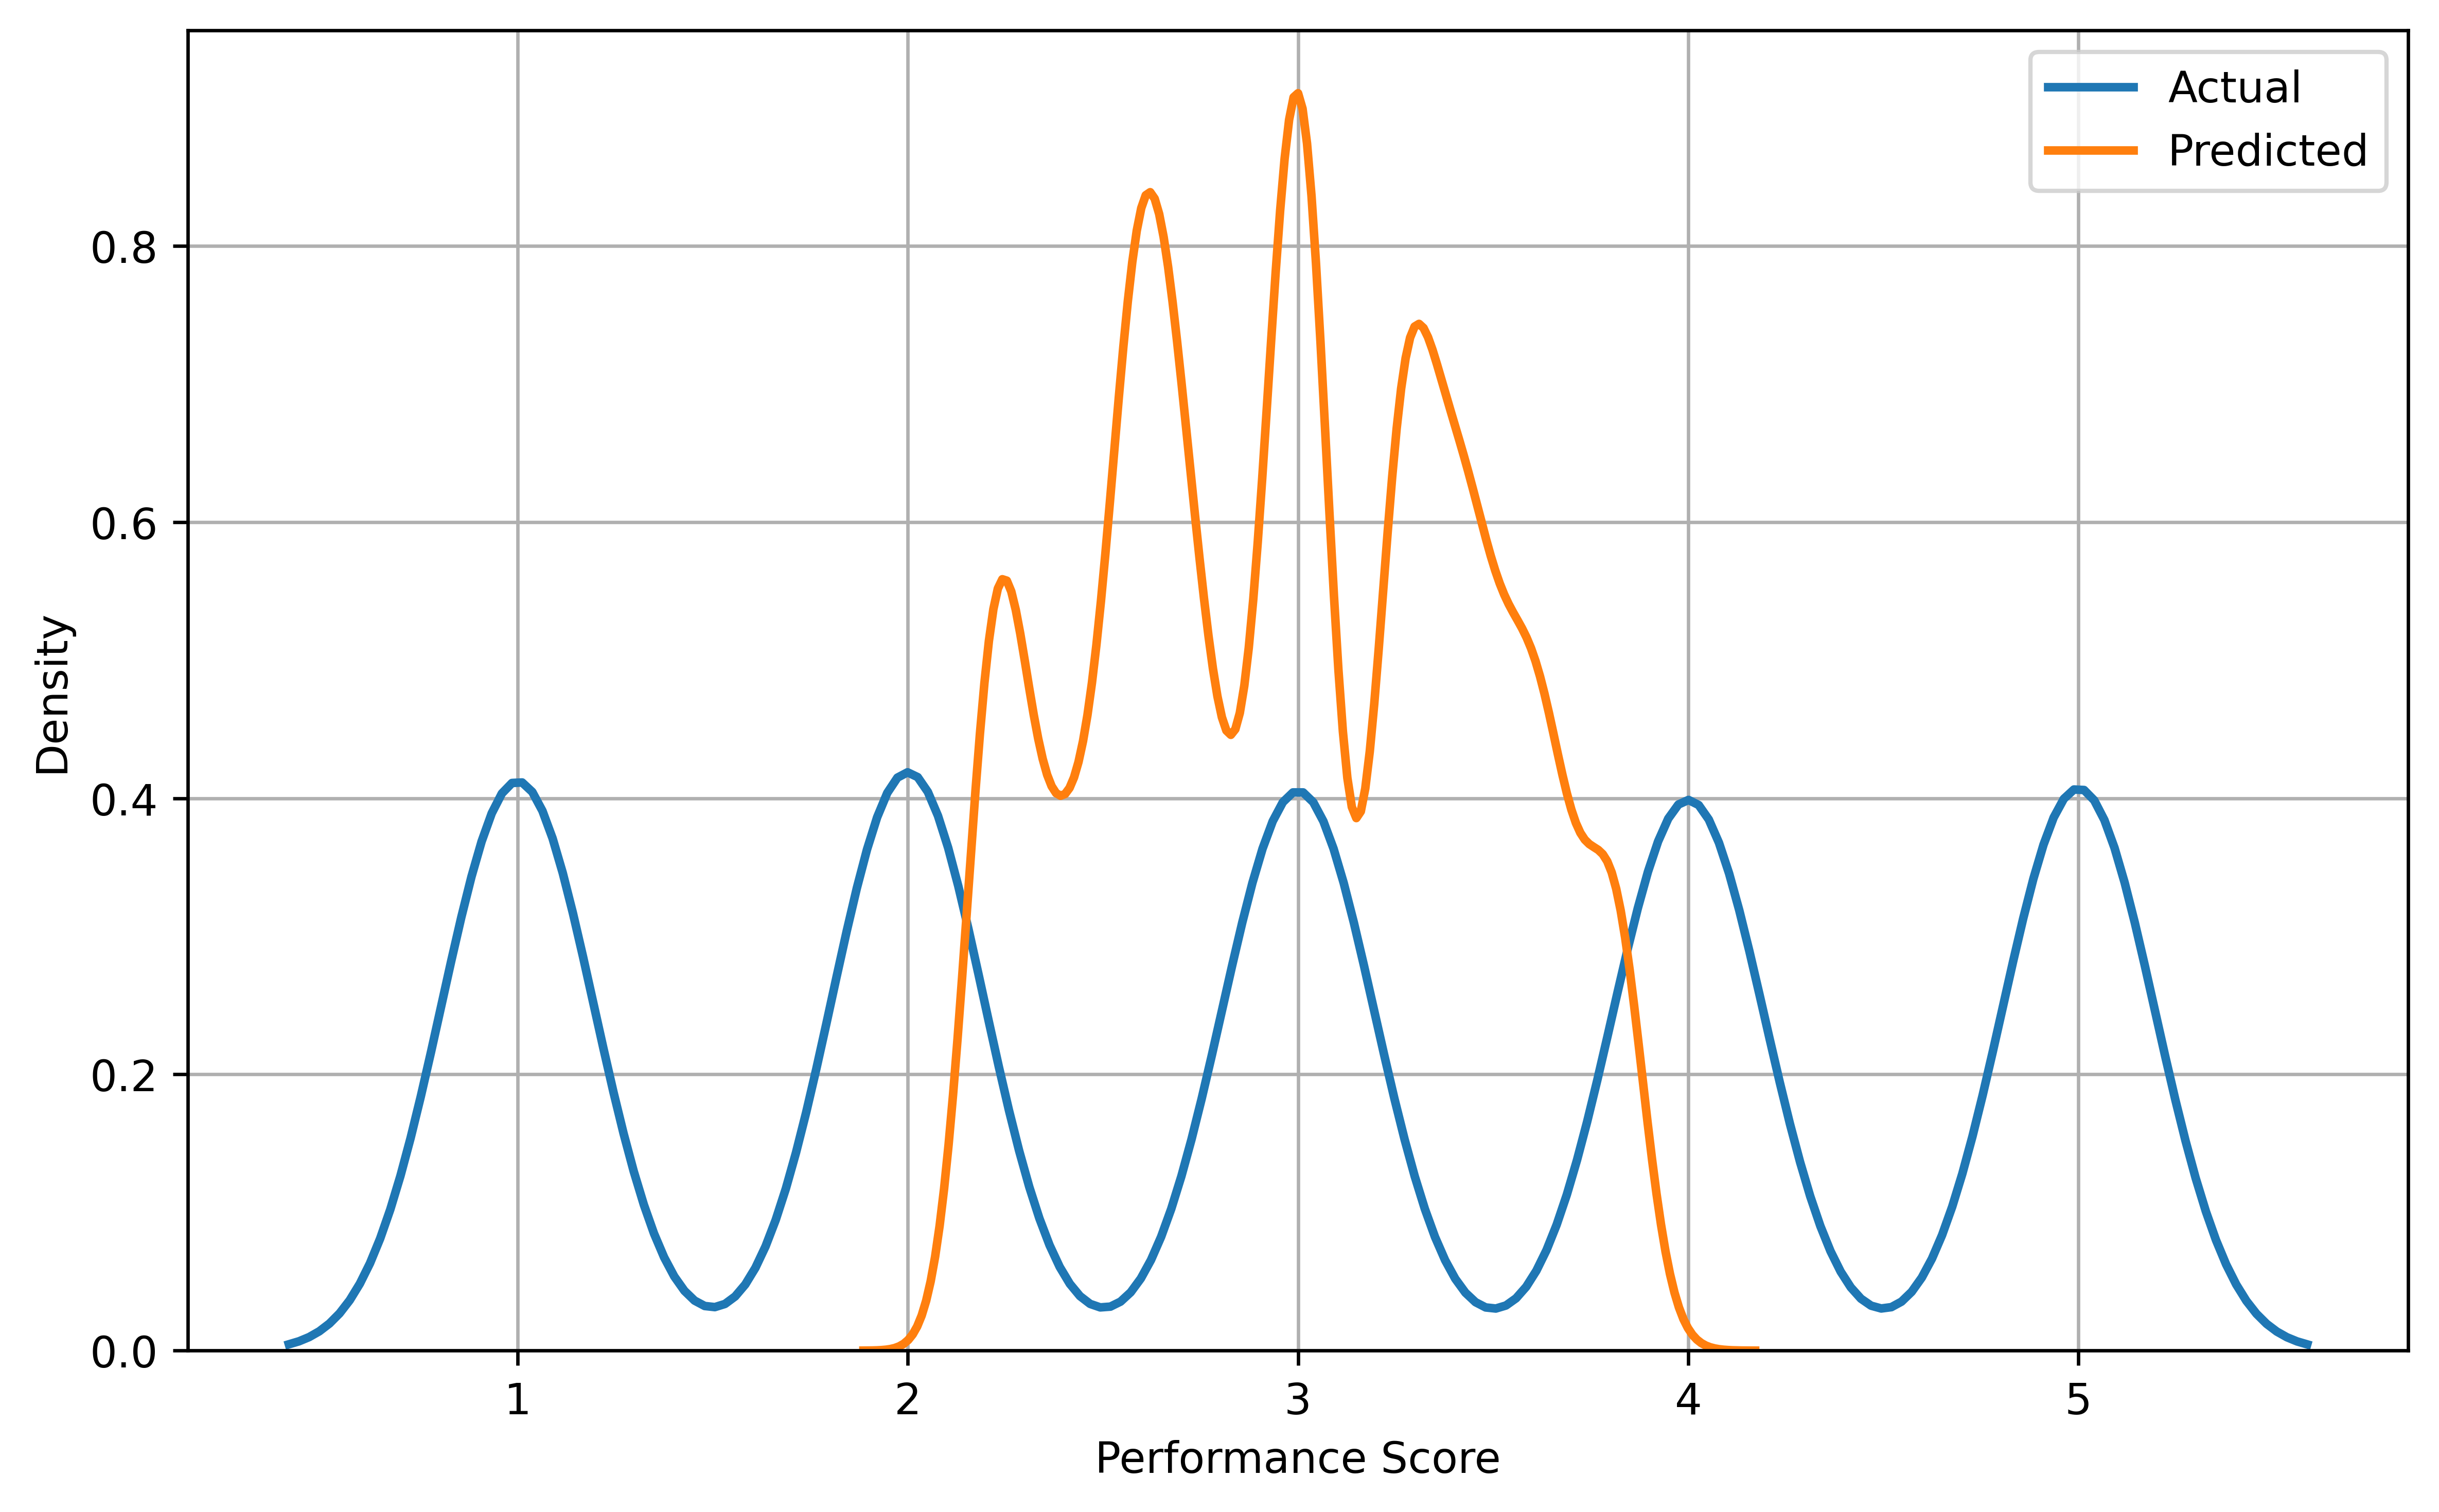

In [6]:
# KDE Plot
import seaborn as sns
plt.figure(figsize=(8, 5), dpi=600)
sns.kdeplot(actual, label="Actual", linewidth=2)
sns.kdeplot(predicted, label="Predicted", linewidth=2)
plt.xlabel("Performance Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

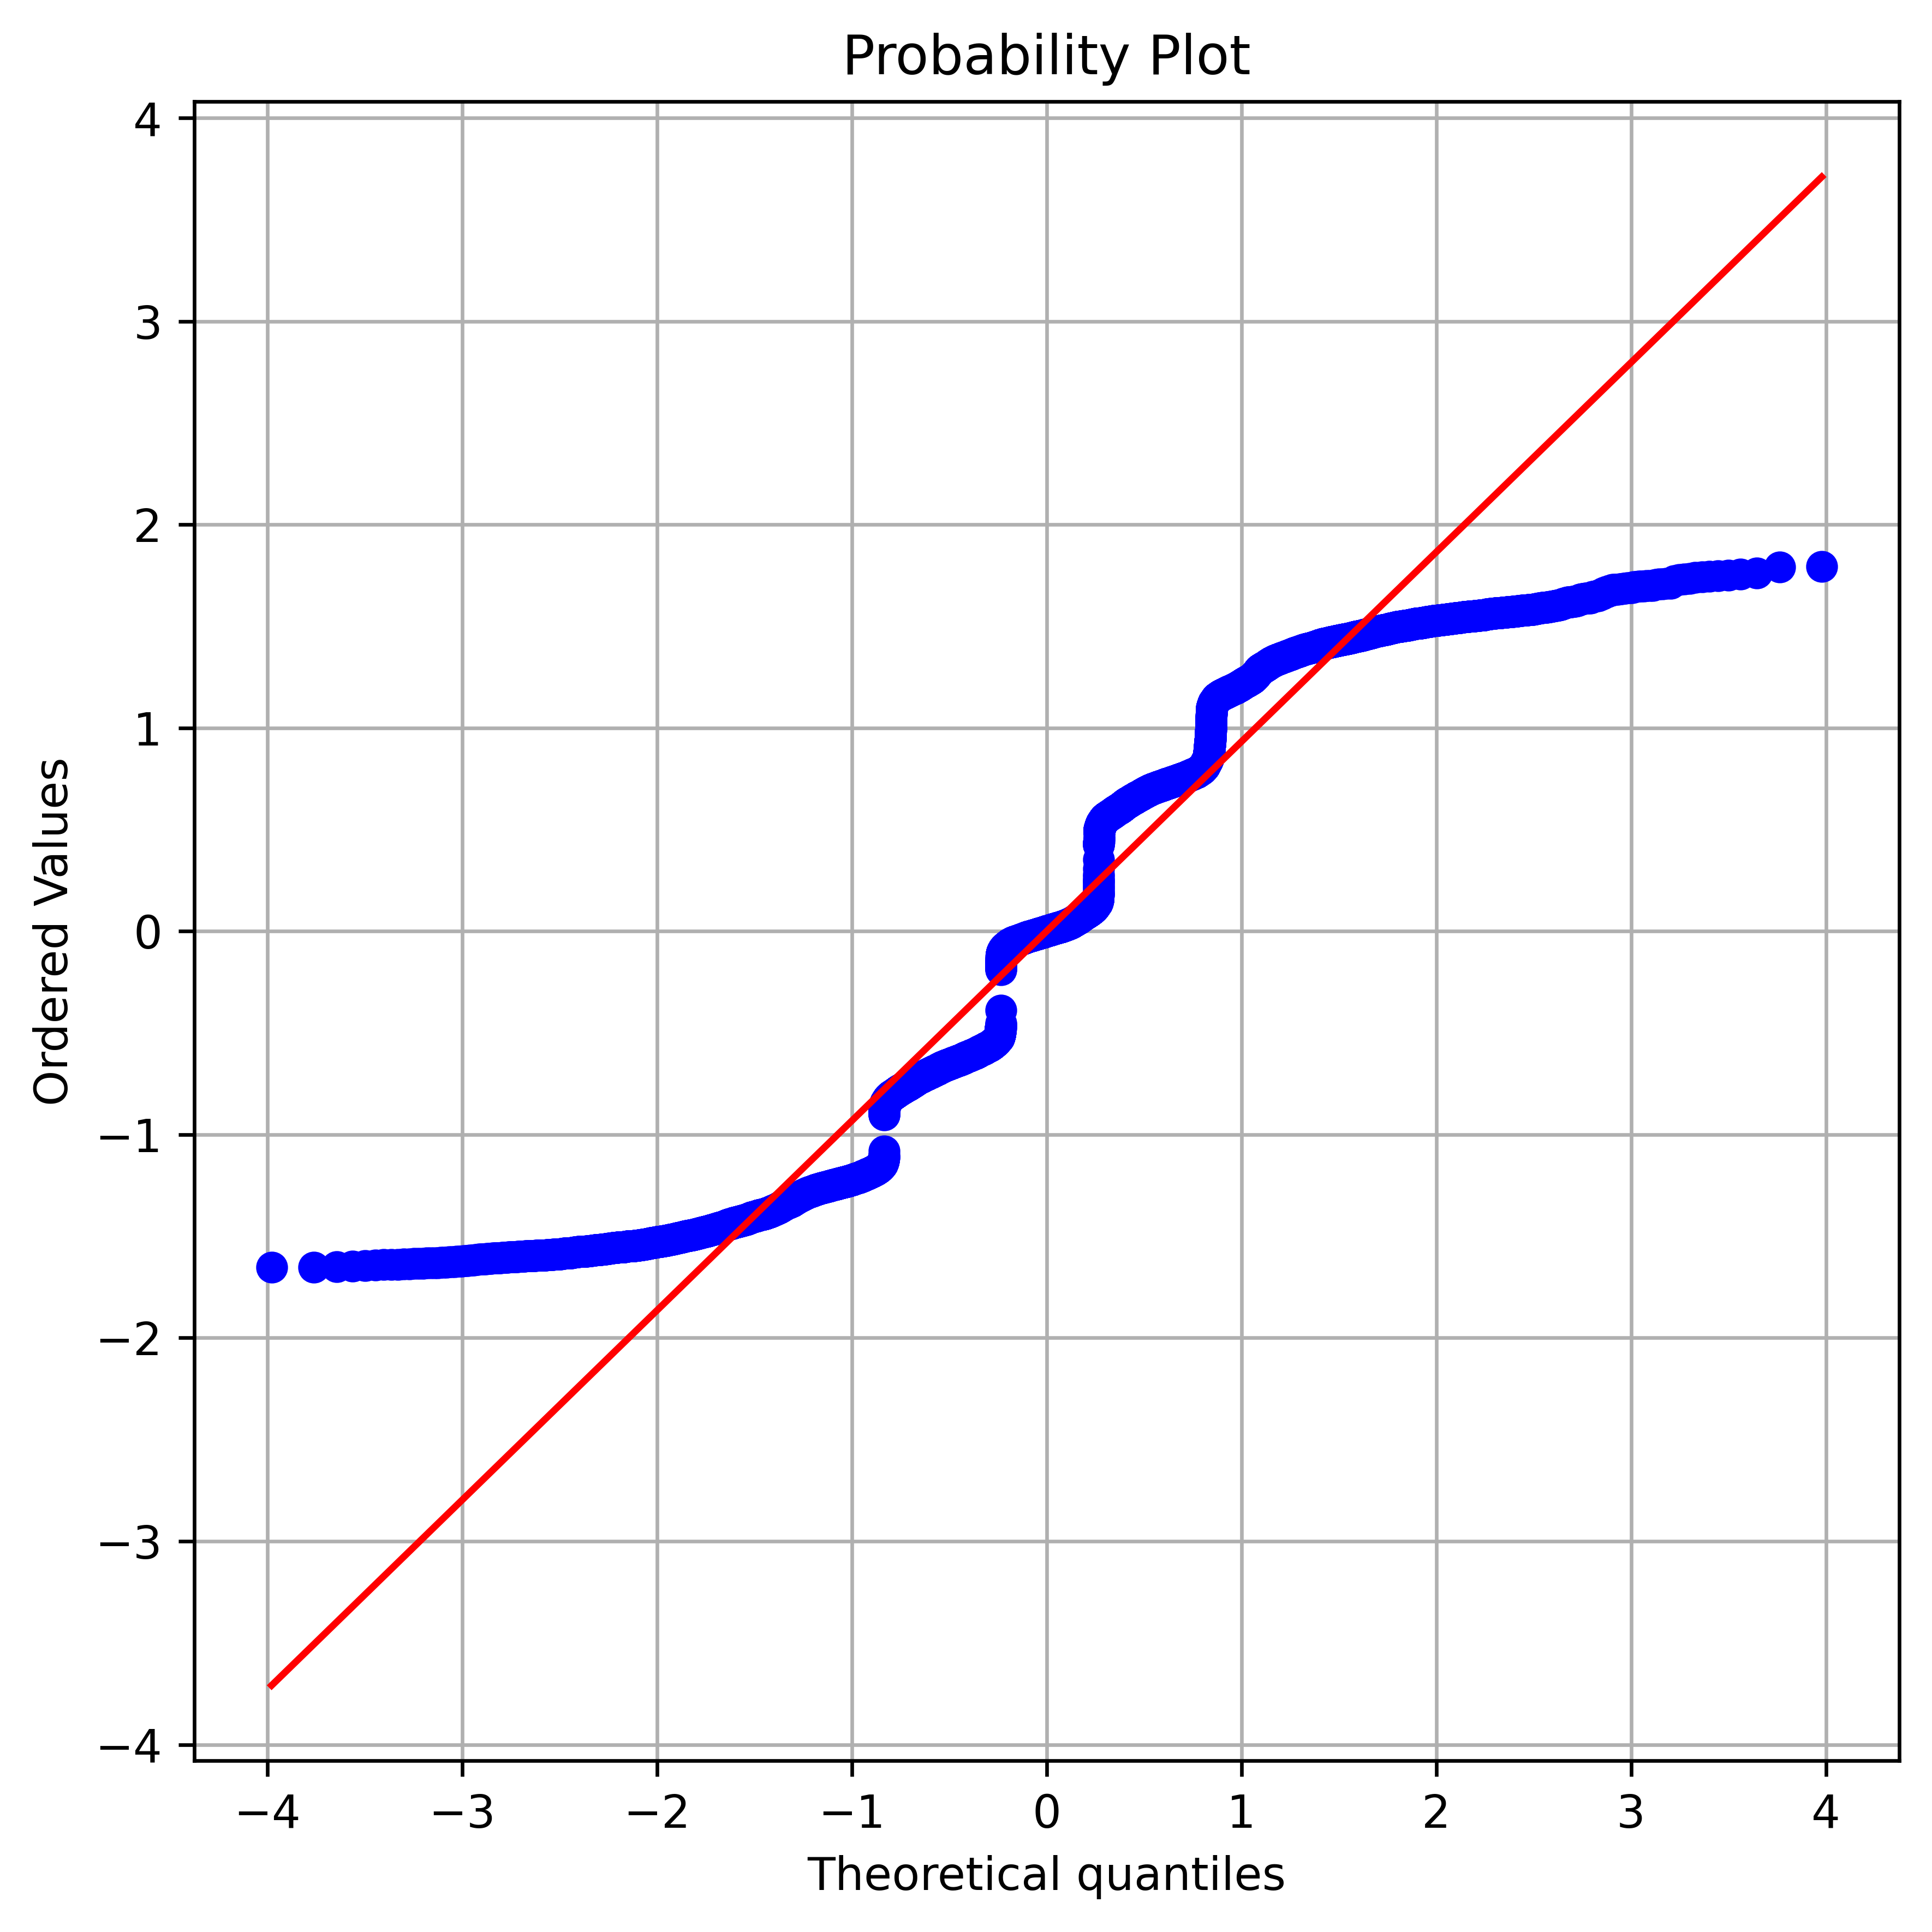

In [7]:
# Q-Q Plot
import scipy.stats as stats
plt.figure(figsize=(6, 6), dpi=600)
stats.probplot(residuals, dist="norm", plot=plt)
plt.grid(True)
plt.tight_layout()
plt.show()